# General Preamble Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

# Additional Import Code for Dataset C

In [2]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()
X = california_housing.data 
y = california_housing.target

# Section A

# Question 1
## Train a DecisionTreeRegressor model using its default parameters (and random_state=0). Evaluate its R-squared score on both the training and test sets. Explain this phenomenon. What is the model doing with the training data, and how well does this behavior generalize to the test data? Why such a generalization outcome?

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

print("############ Assignment 4 Section A Question 1 BEGIN ############")
# fit train test split to Decision Tree Regressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=None)
dtq1 = DecisionTreeRegressor(random_state=0)
dtq1.fit(X_train, y_train)

# evaluate
q1_train_score = dtq1.score(X_train, y_train)
q1_test_score = dtq1.score(X_test, y_test)

print(f"Train R^2: {q1_train_score}")
print(f"Test R^2: {q1_test_score}")

print("The default tree essentially memorizes the training set because it grows without depth constraints, which produces a very high training score but dramatically lower test score (overfitting)")
print("The model captures all the noise of the training data rather than patterns that generalize to unseen data")
print("############ Assignment 4 Section A Question 1 END ############")

############ Assignment 4 Section A Question 1 BEGIN ############
Train R^2: 1.0
Test R^2: 0.5859590482097172
The default tree essentially memorizes the training set because it grows without depth constraints, which produces a very high training score but dramatically lower test score (overfitting)
The model captures all the noise of the training data rather than patterns that generalize to unseen data
############ Assignment 4 Section A Question 1 END ############


# Question 2
## Train a new DecisionTreeRegressor, but this time constrain its growth by setting the hyperparameter max_depth=5 (and random_state=0). Report the training and test R2 scores. Compare these scores to the ones from the unconstrained model in A.1. How did limiting the tree's depth affect the training score and the test score? Explain the trade-off that max_depth controls.

In [4]:
print("############ Assignment 4 Section A Question 2 BEGIN ############")
dtq2 = DecisionTreeRegressor(max_depth=5, random_state=0)
dtq2.fit(X_train, y_train)

q2_train_score = dtq2.score(X_train, y_train)
q2_test_score = dtq2.score(X_test, y_test)

print(f"Train R^2: {q2_train_score}")
print(f"Test R^2: {q2_test_score}")
print(f"Comparing to Question 1 (Unconstrained) Train R^2: {q1_train_score}, Test R^2: {q1_test_score}")

print("Limiting max_depth reduces the model ability to perfectly fit/memorize training data, so the training score is lower")
print("The constraint reduces variance and improves test performance by mitigating overfitting, but if max_depth is too small it can underfit and hurt test performance")
print("Overall, max_depth controls the bias variance trade-off. Smaller depth leads to higher bias, lower variance and larger depth leads to lower bias, higher variance")
print("############ Assignment 4 Section A Question 2 END ############")

############ Assignment 4 Section A Question 2 BEGIN ############
Train R^2: 0.6390020663235397
Test R^2: 0.5919045479347868
Comparing to Question 1 (Unconstrained) Train R^2: 1.0, Test R^2: 0.5859590482097172
Limiting max_depth reduces the model ability to perfectly fit/memorize training data, so the training score is lower
The constraint reduces variance and improves test performance by mitigating overfitting, but if max_depth is too small it can underfit and hurt test performance
Overall, max_depth controls the bias variance trade-off. Smaller depth leads to higher bias, lower variance and larger depth leads to lower bias, higher variance
############ Assignment 4 Section A Question 2 END ############


# Question 3
##  Using matplotlib.pyplot and sklearn.tree.plot_tree, generate a visualization of the pruned tree from A.2. Then, select the first instance from your test set and manually trace its path from the root node to a leaf node. Print the feature values of this instance and the final predicted value from the model. Based on your visualization, describe the series of decisions (the 'if-then' rules) the model used to arrive at the prediction for this specific house. Does this visual interpretability make the model more trustworthy than, for example, a KNN model from Lab 1?

############ Assignment 4 Section A Question 3 BEGIN ############


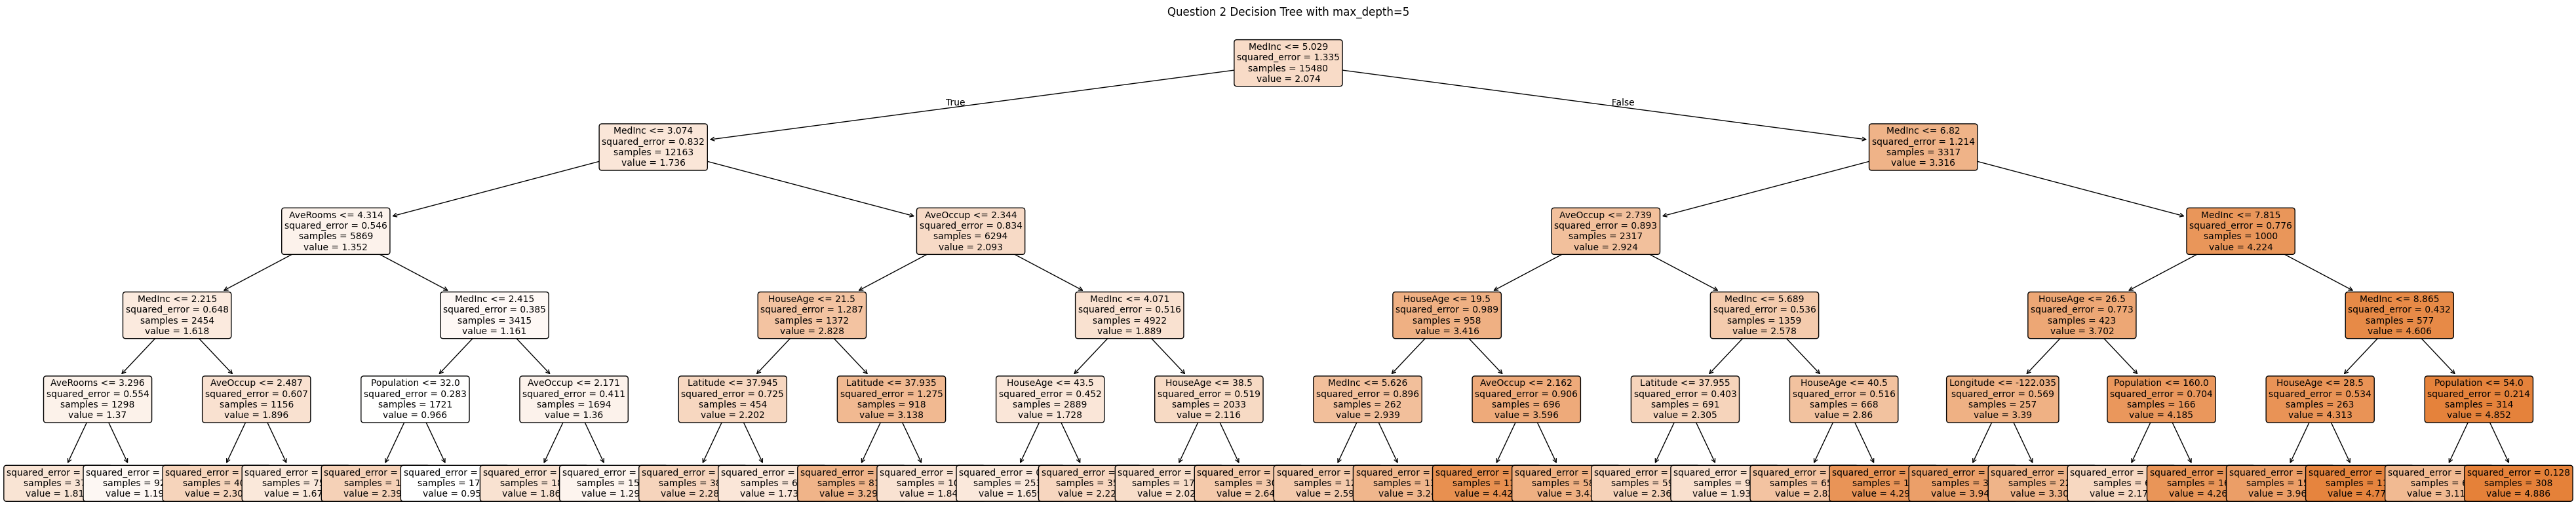

Node 0: feature MedInc = 4.1518 <= 5.0286500453948975
Decision path: 0 -> 30
Node 1: feature MedInc = 4.1518 > 3.074299931526184
Decision path: 1 -> 30
Node 17: feature AveOccup = 4.180592991913747 > 2.344438910484314
Decision path: 17 -> 30
Node 25: feature MedInc = 4.1518 > 4.071200132369995
Decision path: 25 -> 30
Node 29: feature HouseAge = 22.0 <= 38.5
Decision path: 29 -> 30
Reached leaf node: 30
Feature values of the first instance:


/Users/fustin/miniconda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/Users/fustin/miniconda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/var/folders/sb/3v38r2zj0n5054mc_jnzdx500000gn/T/ipykernel_6910/2322961917.py:22: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if instance[feature[node_id]] < threshold[node_id]:
/var/folders/sb/3v38r2zj0n5054mc_jnzdx500000gn/T/ipykernel_6910/2322961917.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treat

MedInc           4.151800
HouseAge        22.000000
AveRooms         5.663073
AveBedrms        1.075472
Population    1551.000000
AveOccup         4.180593
Latitude        32.580000
Longitude     -117.050000
Name: 14740, dtype: float64

Final prediction for this instance: 2.023903687247545
Features and thresholds determine path taken down the tree at each node, and features that appear higher in the tree have larger impact on prediction path to leaf node, which are:
- MedInc
- MedInc
- AveOccup
- MedInc
- HouseAge
The visual interpretability of decision trees build trust in the model because it allows users to see how decisions are made
While decision trees are interpretable, they can still overfit if not properly constrained, and model performance can vary while domain knowledge can change interpretations
KNN models may be less interpretable, but can perform well in certain scenarios and may be more trustworthy if they generalize better
############ Assignment 4 Section A Question 3 END ############


/Users/fustin/miniconda/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [5]:
from sklearn.tree import plot_tree

print("############ Assignment 4 Section A Question 3 BEGIN ############")
# visualize pruned tree from q2
plt.figure(figsize=(50, 10))
plot_tree(dtq2, feature_names=X.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Question 2 Decision Tree with max_depth=5")
plt.show()

instance = X_test.iloc[0] # select first test instance

# trace decision path
node_indicator = dtq2.decision_path([instance])
leaf_id = dtq2.apply([instance])[0]
feature = dtq2.tree_.feature
threshold = dtq2.tree_.threshold

for node_id in node_indicator.indices:
    if leaf_id == node_id:
        print(f"Reached leaf node: {leaf_id}")
        break
    if instance[feature[node_id]] < threshold[node_id]:
        threshold_sign = "<="
    else:
        threshold_sign = ">"
    print(f"Node {node_id}: feature {X.columns[feature[node_id]]} = {instance[feature[node_id]]} "
          f"{threshold_sign} {threshold[node_id]}")
    print(f"Decision path: {node_id} -> {leaf_id}")

# print feature values of the instance and final prediction
print("Feature values of the first instance:")
display(instance)
print(f"Final prediction for this instance: {dtq2.predict([instance])[0]}")

# explain how features contributed to final prediction
print("Features and thresholds determine path taken down the tree at each node, and features that appear higher in the tree have larger impact on prediction path to leaf node, which are:")
for node_id in node_indicator.indices:
    if leaf_id == node_id:
        break
    print(f"- {X.columns[feature[node_id]]}")

# Does this visual interpretability make the model more trustworthy than, for example, a KNN model?
print("The visual interpretability of decision trees build trust in the model because it allows users to see how decisions are made")
print("While decision trees are interpretable, they can still overfit if not properly constrained, and model performance can vary while domain knowledge can change interpretations")
print("KNN models may be less interpretable, but can perform well in certain scenarios and may be more trustworthy if they generalize better")

print("############ Assignment 4 Section A Question 3 END ############")

# Question 4
## Extract the feature_importances_ from the max_depth=5 regressor. Create a horizontal bar chart that plots the importance of each feature, sorted by importance. Identify the top three most important features according to your model. Provide a real-world, intuitive explanation for why each of these features would be highly influential in determining a house's value in California.

############ Assignment 4 Section A Question 4 BEGIN ############


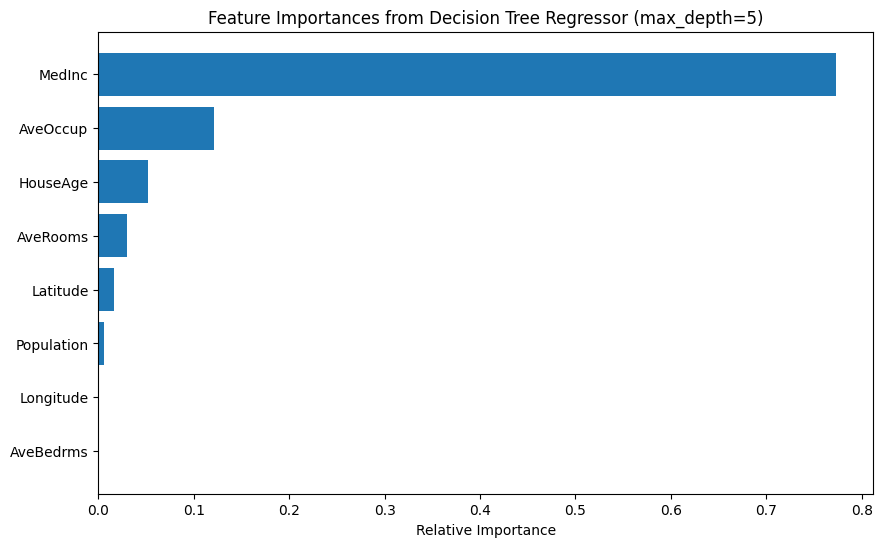

Top 3 Important Features (relative importance):
MedInc: 0.7735600364422689
AveOccup: 0.12074295473815562
HouseAge: 0.05235279101320048

Real-world explanations for top 3 features:
1. MedInc (Median Income): Higher median income in an area typically correlates with higher property values, as residents can afford more expensive homes.
2. AveOccup (Average Occupancy): Areas with higher average occupancy rates may indicate desirable locations with strong demand for housing, driving up property values.
3. HouseAge (House Age): Newer homes often have modern amenities and require less maintenance, making them more attractive to buyers and thus increasing their value.
############ Assignment 4 Section A Question 4 END ############


In [6]:
print("############ Assignment 4 Section A Question 4 BEGIN ############")
# extract feature importances from the max_depth=5 (q2?) regressor
importances = dtq2.feature_importances_
feature_names = X.columns

# create a horizontal bar chart that plots the importance of each feature, sorted by importance
indices = np.argsort(importances)
plt.figure(figsize=(10, 6))
plt.title("Feature Importances from Decision Tree Regressor (max_depth=5)")
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

# Identify the top three most important features according to your model. Provide a real-world, intuitive explanation for why each of these features would be highly influential in determining a house's value in California.
top3_indices = indices[-3:][::-1]
top3_features = [(feature_names[i], importances[i]) for i in top3_indices]
print("Top 3 Important Features (relative importance):")
for feature, importance in top3_features:
    print(f"{feature}: {importance}")
print("\nReal-world explanations for top 3 features:")
print("1. MedInc (Median Income): Higher median income in an area typically correlates with higher property values, as residents can afford more expensive homes.")
print("2. AveOccup (Average Occupancy): Areas with higher average occupancy rates may indicate desirable locations with strong demand for housing, driving up property values.")
print("3. HouseAge (House Age): Newer homes often have modern amenities and require less maintenance, making them more attractive to buyers and thus increasing their value.")
print("############ Assignment 4 Section A Question 4 END ############")

# Question 5
## Train another DecisionTreeRegressor (random_state=0). This time, leave max_depth at its default (None) but set min_samples_leaf=20. Report the training and test R2 scores. Compare the performance of this model (using min_samples_leaf) with the one from A.2 (using max_depth). Which pruning strategy yielded a better test score? Briefly describe a situation where one hyperparameter might be more intuitive to set than the other.

In [7]:
print("############ Assignment 4 Section A Question 5 BEGIN ############")
# train another Decision Tree Regressor (random_state=0) leaving max_depth at its default but set min_samples_leaf=20
dtq5 = DecisionTreeRegressor(min_samples_leaf=20, random_state=0)
dtq5.fit(X_train, y_train)
q5_train_score = dtq5.score(X_train, y_train)
q5_test_score = dtq5.score(X_test, y_test)
print(f"Train R^2: {q5_train_score}")
print(f"Test R^2: {q5_test_score}")

# compare performance
print(f"Question 2 (max_depth=5) Train R^2: {q2_train_score}, Test R^2: {q2_test_score}")
print(f"Question 5 (min_samples_leaf=20) Train R^2: {q5_train_score}, Test R^2: {q5_test_score}")

# which pruning strategy yielded better test score? briefly describe a situation where one hyperparameter might be more intuitive to set than the other
print("The min_samples_leaf=20 strategy yielded a better test score compared to max_depth=5 in this case")
print("Max_depth is better when you want to directly control complexity and limit how deep tree can grow")
print("Min_samples_leaf is better when ensuring that each leaf has a minimum number of samples, which can be useful in datasets with varying densities to prevent overfitting on small subsets of data")  

print("############ Assignment 4 Section A Question 5 END ############")

############ Assignment 4 Section A Question 5 BEGIN ############
Train R^2: 0.8100399439670177
Test R^2: 0.7085519503601241
Question 2 (max_depth=5) Train R^2: 0.6390020663235397, Test R^2: 0.5919045479347868
Question 5 (min_samples_leaf=20) Train R^2: 0.8100399439670177, Test R^2: 0.7085519503601241
The min_samples_leaf=20 strategy yielded a better test score compared to max_depth=5 in this case
Max_depth is better when you want to directly control complexity and limit how deep tree can grow
Min_samples_leaf is better when ensuring that each leaf has a minimum number of samples, which can be useful in datasets with varying densities to prevent overfitting on small subsets of data
############ Assignment 4 Section A Question 5 END ############


# Question 6
## Train a LinearRegression model (from sklearn.linear_model) on the same training data. Report its test R2 score. How does the linear model's performance compare to your best decision tree model? Decision trees can capture non-linear relationships, while linear regression cannot. Despite this, describe a scenario or a business reason why you might still choose the linear model for this problem.

In [8]:
print("############ Assignment 4 Section A Question 6 BEGIN ############")
# train a LinearRegression model on same training data and report test R^2 score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print(f"Train R^2: {lr_train_score}")
print(f"Test R^2: {lr_test_score}")

# How does the linear model's performance compare to your best decision tree model? Decision trees can capture non-linear relationships, while linear regression cannot. Despite this, describe a scenario or a business reason why you might still choose the linear model for this problem.
print(f"Best Decision Tree Regressor Train R^2: {max(q1_train_score, q2_train_score, q5_train_score)}, Test R^2: {max(q1_test_score, q2_test_score, q5_test_score)}")
print("The best decision tree model outperformed the linear regression model on both training and test R^2 scores because it captures underlying data patterns better due to its ability to model non-linear relationships")
print("However, the linear model is preferred in some cases for its simplicity, especially if businesses want to use the data to understand the influence of each feature on house prices")
print("since linear regression provides a clear coefficient that indicates direction and magnitude of feature impact, which can be crucial for decision making and communicating insights")

print("############ Assignment 4 Section A Question 6 END ############")

############ Assignment 4 Section A Question 6 BEGIN ############
Train R^2: 0.6109633715458154
Test R^2: 0.5911695436410471
Best Decision Tree Regressor Train R^2: 1.0, Test R^2: 0.7085519503601241
The best decision tree model outperformed the linear regression model on both training and test R^2 scores because it captures underlying data patterns better due to its ability to model non-linear relationships
However, the linear model is preferred in some cases for its simplicity, especially if businesses want to use the data to understand the influence of each feature on house prices
since linear regression provides a clear coefficient that indicates direction and magnitude of feature impact, which can be crucial for decision making and communicating insights
############ Assignment 4 Section A Question 6 END ############


# Question 7
## Create a MinMaxScaler (from sklearn.preprocessing) and use it to scale your training and test features. Train your best-performing decision tree regressor (from A.2 or A.5) on this scaled data. Report the test R2. Is the R2 score is identical to the score you got on the unscaled data? In Lab 2, you saw that scaling dramatically impacted other models' performance. Explain, with reference to the fundamental splitting mechanism of a decision tree, why it is immune to this type of feature scaling.

In [9]:
print("############ Assignment 4 Section A Question 7 BEGIN ############")
# create a MinMaxScaler and use it to scale training and test features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# train q5 decision tree regressor on scaled data
dtq7 = DecisionTreeRegressor(min_samples_leaf=20, random_state=0)
dtq7.fit(X_train_scaled, y_train)
q7_train_score = dtq7.score(X_train_scaled, y_train)
q7_test_score = dtq7.score(X_test_scaled, y_test)
print(f"Train R^2: {q7_train_score}")
print(f"Test R^2: {q7_test_score}")

# compare to unscaled q5 model
print(f"Unscaled Question 5 (min_samples_leaf=20) Train R^2: {q5_train_score}, Test R^2: {q5_test_score}")
print(f"Scaled Question 7 (min_samples_leaf=20) Train R^2: {q7_train_score}, Test R^2: {q7_test_score}")
print("Scaling features with MinMaxScaler had no effect on the performance of decision tree regressor because decision trees are not sensitive to feature scaling")

# exaplain with reference to fundamental splitting mechanism of decision tree and why it is immune to feature scaling
print("Decision trees split data based on feature thresholds and relative ordering of feature values, rather than absolute magnitudes")
print("Since scaling transforms features linearly without changing their relative order or distribution, splits made by the decision tree remain unchanged")
print("In contrast, linear regression/KNN rely on distance metrics/coefficients that are directly affected by feature scales, making them sensitive to scaling")

print("############ Assignment 4 Section A Question 7 END ############")

############ Assignment 4 Section A Question 7 BEGIN ############
Train R^2: 0.8100399439670177
Test R^2: 0.7086700743186396
Unscaled Question 5 (min_samples_leaf=20) Train R^2: 0.8100399439670177, Test R^2: 0.7085519503601241
Scaled Question 7 (min_samples_leaf=20) Train R^2: 0.8100399439670177, Test R^2: 0.7086700743186396
Scaling features with MinMaxScaler had no effect on the performance of decision tree regressor because decision trees are not sensitive to feature scaling
Decision trees split data based on feature thresholds and relative ordering of feature values, rather than absolute magnitudes
Since scaling transforms features linearly without changing their relative order or distribution, splits made by the decision tree remain unchanged
In contrast, linear regression/KNN rely on distance metrics/coefficients that are directly affected by feature scales, making them sensitive to scaling
############ Assignment 4 Section A Question 7 END ############


# Section B

# Question 1
## The goal is now to predict a price category. Using pandas.qcut, discretize the target variable y into four categories based on its quantiles. Use the labels ['Low', 'Medium', 'High', 'Very High']. Create a new train/test split for X and this new categorical target, y_cat. Remember to use random_state=0 and include stratify=y_cat in your train_test_split function to maintain class proportions. Report the value counts of your new categorical target variable. What is the advantage of using qcut (quantile-based cutting) versus cut (equal-width cutting) for this task?

In [10]:
print("############ Assignment 4 Section B Question 1 BEGIN ############")

print("############ Assignment 4 Section B Question 1 END ############")

############ Assignment 4 Section B Question 1 BEGIN ############
############ Assignment 4 Section B Question 1 END ############


# Question 2
## Train a default DecisionTreeClassifier (random_state=0) on the new training data. Report its accuracy on the test set. What is a key indicator from the model's attributes (e.g., by calling get_depth() or get_n_leaves()) that would suggest it has grown to be overly complex? Do you think this model is overfitting?

In [11]:
print("############ Assignment 4 Section B Question 2 BEGIN ############")

print("############ Assignment 4 Section B Question 2 END ############")

############ Assignment 4 Section B Question 2 BEGIN ############
############ Assignment 4 Section B Question 2 END ############


# Question 3
## Train a new DecisionTreeClassifier with max_depth=5 and random_state=0. Report its test accuracy and generate a visualized confusion matrix for its predictions on the test set using ConfusionMatrixDisplay. Interpret the confusion matrix. Which price category does the model struggle with the most (i.e., which true label has the most misclassifications into other categories)? Provide a hypothesis for why this might be the case.

In [12]:
print("############ Assignment 4 Section B Question 3 BEGIN ############")

print("############ Assignment 4 Section B Question 3 END ############")

############ Assignment 4 Section B Question 3 BEGIN ############
############ Assignment 4 Section B Question 3 END ############


# Question 4
## Train one more DecisionTreeClassifier with max_depth=5 and random_state=0, but this time set the hyperparameter criterion='entropy'. Report its test accuracy. Compare the accuracy of the 'entropy' model to the 'gini' model from B.3. In practice, the performance difference is often negligible. Briefly explain the conceptual goal of both Gini Impurity and Information Gain (derived from entropy) in the context of finding the best split in a tree.

In [13]:
print("############ Assignment 4 Section B Question 4 BEGIN ############")

print("############ Assignment 4 Section B Question 4 END ############")

############ Assignment 4 Section B Question 4 BEGIN ############
############ Assignment 4 Section B Question 4 END ############


# Question 5
## Extract and plot the feature_importances_ from your best-performing classification tree (max_depth=5, Gini). Create a sorted horizontal bar chart. Visually compare this feature importance plot to the one you generated for the regression tree in A.4. Are the top three most important features the same? If not, propose a reason why a feature's importance might change when the problem is reframed from predicting an exact value to predicting a category.

In [14]:
print("############ Assignment 4 Section B Question 5 BEGIN ############")

print("############ Assignment 4 Section B Question 5 END ############")

############ Assignment 4 Section B Question 5 BEGIN ############
############ Assignment 4 Section B Question 5 END ############


# Question 6
## You have now modeled California housing prices as both a regression and a classification problem using the same underlying algorithm. Discuss the trade-offs of these two approaches. Describe a specific business problem for a real estate company that would be better served by the classification model. Then, describe a different problem for a government agency that would absolutely require the regression model.

In [15]:
print("############ Assignment 4 Section B Question 6 BEGIN ############")

print("############ Assignment 4 Section B Question 6 END ############")

############ Assignment 4 Section B Question 6 BEGIN ############
############ Assignment 4 Section B Question 6 END ############
